In [17]:
import pandas as pd
from data_cleaning.calc_fpoints import calc_fpoints_batter, calc_fpoints_pitcher
from data_cleaning.combine_dfs import combine_metrics_stats, pitch_combine_metrics_stats
from plotting.plots import plot_top_x_corr

In [18]:
# Reading in data and calculating fantasy points
# Minimum PA of 50 for both datasets
batter_data = pd.read_csv("data/batter_base_stats.csv")
batter_fpoints = calc_fpoints_batter(batter_data, output = False)

batter_fpoints.head()

,Name,year,age,IP,H,K,BB,ER,S,W,L,Hold,Fpoints,Fpoints_IP
0,"Colon, Bartolo",2015,42,194.2,217,136,24,90,0,14,13,0,297.6,1.532441
1,"Hawkins, LaTroy",2015,42,38.2,44,34,7,14,3,3,1,7,69.6,1.821990
2,"Wolf, Randy",2015,38,34.2,46,28,15,24,0,0,5,1,21.6,0.631579
3,"Marquis, Jason",2015,36,47.1,64,37,14,34,0,3,4,0,32.3,0.685775
4,"Burnett, A.J.",2015,38,164.0,174,143,49,58,0,9,7,0,296.0,1.804878


In [19]:
# Combining dataframes with fantasy points and metrics
batter_metrics = pd.read_csv("data/batter_metrics.csv")
batter_combined = combine_metrics_stats(batter_fpoints, batter_metrics, save=False)
batter_combined.head()

,Name,Fpoints_G,year,age,k_percent,bb_percent,xba,xslg,woba,xwoba,...,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,groundballs_percent,flyballs_percent,linedrives_percent,popups_percent,sprint_speed
0,"Colon, Bartolo",-0.741935,2016,43,37.5,0.0,0.153,0.169,0.136,0.153,...,30.6,58.1,20.5,48.7,30.8,69.2,5.1,17.9,7.7,20.2
1,"Ortiz, David",3.543046,2016,40,15.5,12.5,0.301,0.616,0.379,0.420,...,23.2,44.7,41.9,36.4,21.7,37.6,25.6,28.7,8.1,23.1
2,"Rodriguez, Alex",1.215385,2016,40,23.4,13.5,0.247,0.494,0.361,0.368,...,32.0,43.9,38.4,43.9,16.6,43.6,24.9,24.9,6.5,23.9
3,"Beltré, Adrian",3.137255,2016,37,10.5,6.6,0.295,0.482,0.337,0.360,...,16.8,48.1,35.3,41.4,23.3,42.4,18.4,31.6,7.6,26.4
4,"Beltrán, Carlos",2.543046,2016,39,16.0,8.5,0.274,0.448,0.346,0.346,...,18.1,45.4,40.1,38.3,19.3,36.8,26.6,28.1,8.5,25.6


In [20]:
pitcher_metrics = pd.read_csv("data/pitcher_metrics.csv")
pitcher_combined = pitch_combine_metrics_stats(pitcher_fpoints, pitcher_metrics, save = False)
pitcher_combined.head()

,Name,Fpoints_IP,year,age,k_percent,bb_percent,xba,xslg,woba,xwoba,...,breaking_avg_break_z_induced,breaking_avg_break,breaking_range_speed,n_offspeed_formatted,offspeed_avg_speed,offspeed_avg_spin,offspeed_avg_break_x,offspeed_avg_break_z,offspeed_avg_break_z_induced,offspeed_avg_break
0,"Colon, Bartolo",1.692469,2016,43,16.7,2.9,0.268,0.427,0.316,0.314,...,3.3,6.5,1.8,7.4,82.6,1727.0,-13.2,-32.0,9.0,16.4
1,"Grilli, Jason",2.169492,2016,39,32.1,7.1,0.221,0.359,0.269,0.275,...,-3.0,12.7,1.2,0.2,86.5,2257.0,-15.3,-26.5,10.8,18.7
2,"Benoit, Joaquín",2.187500,2016,38,24.8,9.1,0.194,0.328,0.243,0.271,...,4.8,6.5,1.8,34.4,84.7,1434.0,-12.4,-36.0,2.8,13.1
3,"Belisle, Matt",2.217391,2016,36,16.8,10.1,0.238,0.320,0.306,0.297,...,0.6,8.8,5.0,3.1,86.4,1838.0,-5.9,-33.6,3.7,7.9
4,"Sabathia, CC",1.655134,2016,35,18.9,6.9,0.253,0.378,0.343,0.304,...,-0.1,11.8,1.5,14.0,83.9,1950.0,11.1,-30.1,9.4,15.0


## EDA on batter data

In [21]:
batter_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3224 entries, 0 to 3223
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    3224 non-null   object 
 1   Fpoints_G               3224 non-null   float64
 2   year                    3224 non-null   int64  
 3   age                     3224 non-null   int64  
 4   k_percent               3224 non-null   float64
 5   bb_percent              3224 non-null   float64
 6   xba                     3224 non-null   float64
 7   xslg                    3224 non-null   float64
 8   woba                    3224 non-null   float64
 9   xwoba                   3224 non-null   float64
 10  xobp                    3224 non-null   float64
 11  xiso                    3224 non-null   float64
 12  xwobacon                3224 non-null   float64
 13  xbacon                  3224 non-null   float64
 14  avg_swing_speed         0 non-null      

In [22]:
batter_combined.isna().sum()

Name                         0
Fpoints_G                    0
year                         0
age                          0
k_percent                    0
bb_percent                   0
xba                          0
xslg                         0
woba                         0
xwoba                        0
xobp                         0
xiso                         0
xwobacon                     0
xbacon                       0
avg_swing_speed           3224
fast_swing_rate           3224
blasts_contact            3224
blasts_swing              3224
squared_up_contact        3224
squared_up_swing          3224
avg_swing_length          3224
exit_velocity_avg            0
launch_angle_avg             0
sweet_spot_percent           0
barrel_batted_rate           0
solidcontact_percent         0
flareburner_percent          0
poorlyunder_percent          0
poorlytopped_percent         0
poorlyweak_percent           0
hard_hit_percent             0
avg_best_speed               0
avg_hype

In [23]:
# Unfortunately all swing data is not possible to use since it was introduced in 2024. 
remove = ['avg_swing_speed',
 'fast_swing_rate',
 'blasts_contact',
 'blasts_swing',
 'squared_up_contact',
 'squared_up_swing',
 'avg_swing_length']

batter_combined = batter_combined.drop(columns = remove)
batter_combined.isna().sum()

Name                      0
Fpoints_G                 0
year                      0
age                       0
k_percent                 0
bb_percent                0
xba                       0
xslg                      0
woba                      0
xwoba                     0
xobp                      0
xiso                      0
xwobacon                  0
xbacon                    0
exit_velocity_avg         0
launch_angle_avg          0
sweet_spot_percent        0
barrel_batted_rate        0
solidcontact_percent      0
flareburner_percent       0
poorlyunder_percent       0
poorlytopped_percent      0
poorlyweak_percent        0
hard_hit_percent          0
avg_best_speed            0
avg_hyper_speed           0
z_swing_percent           0
z_swing_miss_percent      0
oz_swing_percent          0
oz_swing_miss_percent     0
oz_contact_percent        0
out_zone_percent          0
meatball_swing_percent    0
iz_contact_percent        0
edge_percent              0
whiff_percent       

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_29038/1171210628.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = batter_combined.corr()['Fpoints_G'].abs().sort_values(ascending=False)


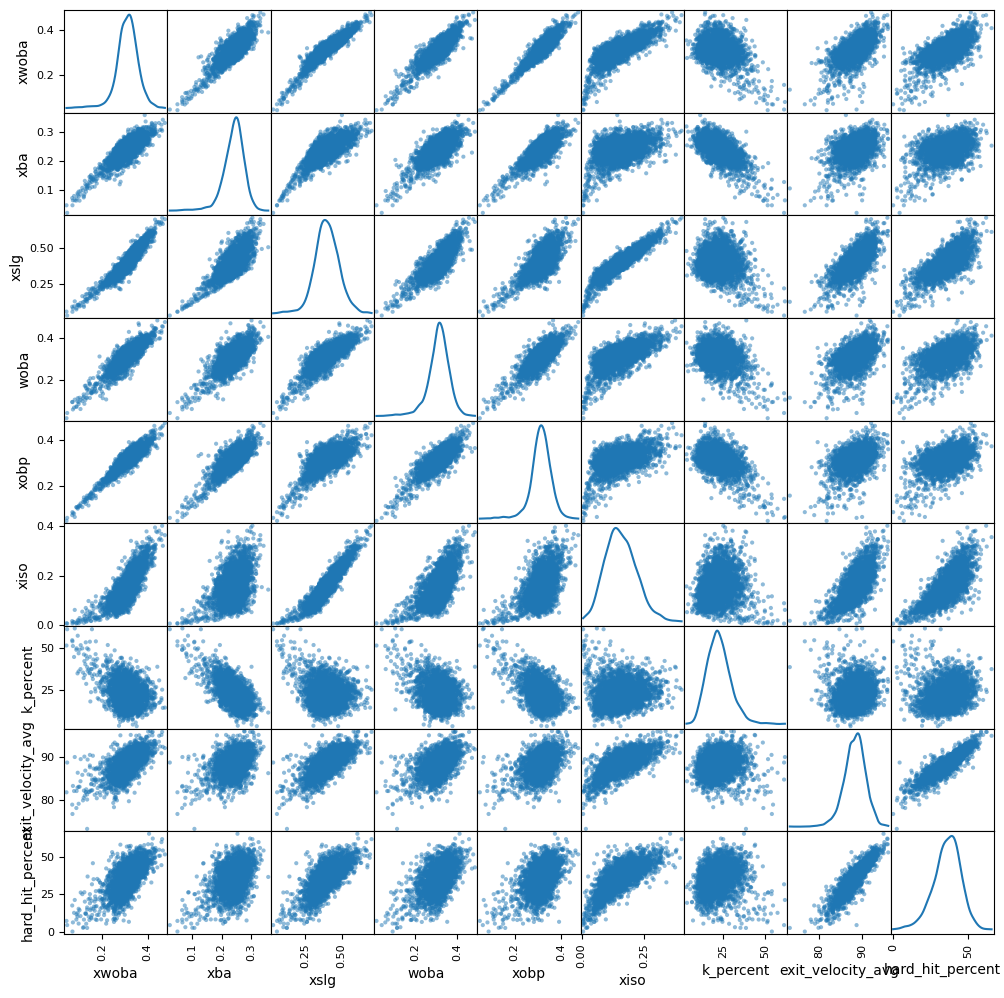

In [25]:
plot_top_x_corr(batter_combined, 10, "scatter")

We see lots of strong correlations here - makes sense since a lot of these columns consider similar things. Also all are approx normally distributed. 

/var/folders/h6/_rz_hgwd06q2j4rsml2mr9yr0000gn/T/ipykernel_29038/1171210628.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = batter_combined.corr()['Fpoints_G'].abs().sort_values(ascending=False)


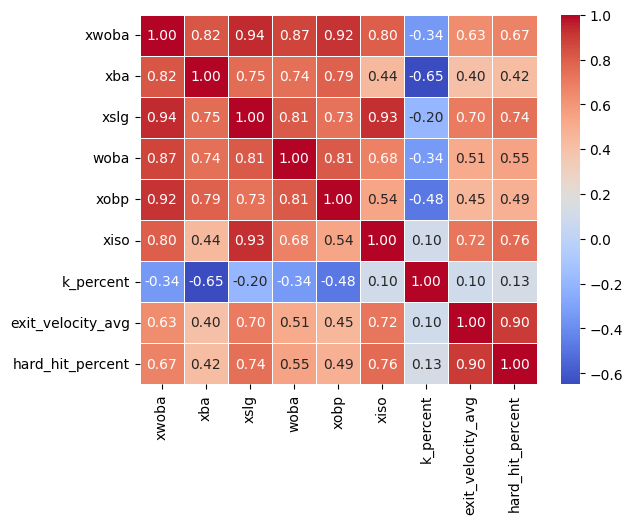

In [26]:
plot_top_x_corr(batter_combined, 10, "correlation")


We see high correlations between many stats - as expected. K% has negative correlations also as expected. Will likely need to address this somehow with feature selection. 